In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the student behavior data from CSV
df = pd.read_csv('student_behavior_data.csv')

In [16]:
# Create binary target: 1 if attention >= 0.5, else 0
df['attentive'] = df['Attention'].apply(lambda x: 1 if x >= 0.5 else 0)

In [18]:
# Drop irrelevant columns before training
df = df.drop(columns=['Timestamp', 'Student ID', 'Date', 'Class Subject', 'Attention'])

In [20]:
# Encode categorical string columns into numeric values
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [22]:
# Separate features (X) and target (y)
X = df.drop(columns=['attentive'])
y = df['attentive']

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [30]:
# Display the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[188 110]
 [ 71 231]]
              precision    recall  f1-score   support

           0       0.73      0.63      0.68       298
           1       0.68      0.76      0.72       302

    accuracy                           0.70       600
   macro avg       0.70      0.70      0.70       600
weighted avg       0.70      0.70      0.70       600



In [32]:
# Calculate and sort feature importances
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)

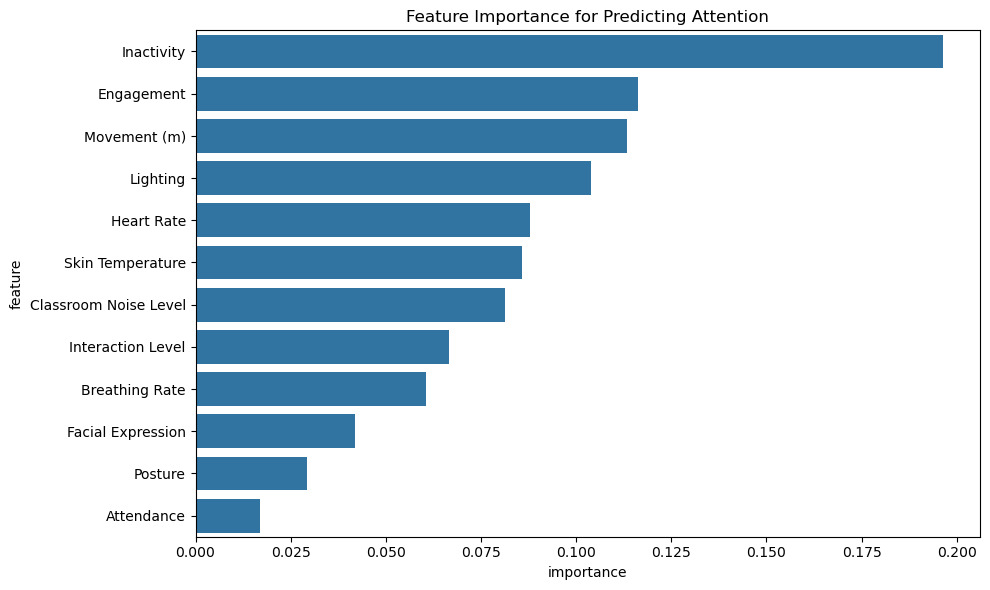

In [34]:
# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title("Feature Importance for Predicting Attention")
plt.tight_layout()
plt.show()